# SimRank (15 - 30 pts)

### Given Data

![pic](graph.jpg)

In [1]:
import networkx as nx
from matplotlib import pyplot as plt
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 5), (0, 4), (0, 6),
                  (1, 5), (1, 2),
                  (2, 5), (2, 3),
                  (3, 5), (3, 4), (3, 6),
                  (5, 4),
                  (6, 4), (6, 7), (6, 11), (6, 10),
                  (7, 8), (7, 11), (7, 12),
                  (8, 12), (8, 9),
                  (9, 13), (9, 10), (9, 12),
                  (10, 12), (10, 11),
                  (11, 12),
                 ])

In [19]:
# Fully connected version of G
G2 = nx.complete_graph(len(G.nodes))

In [35]:
gpos = nx.spring_layout(G)

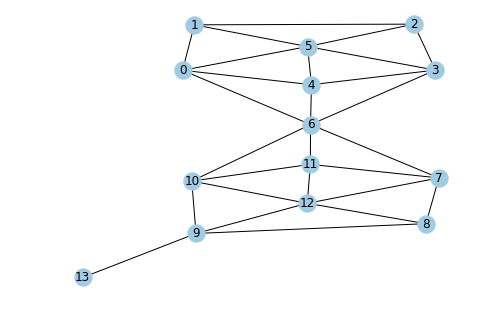

In [36]:
nx.draw(G, pos=gpos, node_color='#A0CBE2', with_labels=True)
plt.show()

### 4. Implement SimRank

SimRank is defined like this:

$$s(a, b) = \dfrac{C}{|(N(a)||N(b)|} \sum_{i=1}^{|(N(a)|} {\sum_{j=1}^{|N(b)|}{s(N_i(a), N_j(b))}} $$
where $N$ is the set of neighbours, and $s(a, a) = 1$



In [22]:
from collections import defaultdict
import copy
def simrank(G, r=0.9, max_iter=100, verbose=False):
    # init. vars
    sim_old = defaultdict(list)
    sim = defaultdict(list)
    
    # sim - matrix of similarities. By default only diagonal is inited by 1s and all other elements 0s
    # sim_old - matrix to check convergence. By default all zeros.
    for n in G.nodes():
        sim[n] = defaultdict(int)
        sim[n][n] = 1
        sim_old[n] = defaultdict(int)
        sim_old[n][n] = 0

    # recursively calculate simrank
    for iter_ctr in range(max_iter):
        if _is_converge(sim, sim_old):
            break
        sim_old = copy.deepcopy(sim)
        for u in G.nodes():
            for v in G.nodes():
                if u == v:
                      continue
                s_uv = 0.0
                for n_u in G.neighbors(u):
                    for n_v in G.neighbors(v):
                        s_uv += sim_old[n_u][n_v]
                sim[u][v] = (r * s_uv / (len(list(G.neighbors(u))) * len(list(G.neighbors(v)))))
        if verbose:
            print("iteration #", iter_ctr)
            for i in range(len(G.nodes())):
                print(["%.2f" % sim[i][j] for j in range(len(G.nodes()))])
    return sim

def _is_converge(s1, s2, eps=1e-3):
    for i in s1.keys():
        for j in s1[i].keys():
            if abs(s1[i][j] - s2[i][j]) >= eps:
                return False
    return True

In [23]:
G_simrank = simrank(G, verbose=True)
sim_edge_col = []
for e in G.edges:
    sim_edge_col.append(G_simrank[e[0]][e[1]])

iteration # 0
['1.00', '0.07', '0.15', '0.17', '0.11', '0.09', '0.04', '0.06', '0.00', '0.00', '0.06', '0.06', '0.00', '0.00']
['0.07', '1.00', '0.10', '0.15', '0.15', '0.12', '0.05', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']
['0.15', '0.10', '1.00', '0.07', '0.15', '0.12', '0.05', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']
['0.17', '0.15', '0.07', '1.00', '0.11', '0.09', '0.04', '0.06', '0.00', '0.00', '0.06', '0.06', '0.00', '0.00']
['0.11', '0.15', '0.15', '0.11', '1.00', '0.09', '0.07', '0.06', '0.00', '0.00', '0.06', '0.06', '0.00', '0.00']
['0.09', '0.12', '0.12', '0.09', '0.09', '1.00', '0.09', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']
['0.04', '0.05', '0.05', '0.04', '0.07', '0.09', '1.00', '0.04', '0.05', '0.04', '0.04', '0.07', '0.09', '0.00']
['0.06', '0.00', '0.00', '0.06', '0.06', '0.00', '0.04', '1.00', '0.07', '0.11', '0.17', '0.11', '0.09', '0.00']
['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.05', '0.07', '1.00', '0.07', '

['0.46', '0.45', '1.00', '0.42', '0.46', '0.47', '0.34', '0.24', '0.21', '0.20', '0.24', '0.25', '0.22', '0.19']
['0.47', '0.46', '0.42', '1.00', '0.43', '0.43', '0.33', '0.30', '0.23', '0.23', '0.30', '0.30', '0.24', '0.22']
['0.43', '0.46', '0.46', '0.43', '1.00', '0.43', '0.36', '0.30', '0.24', '0.23', '0.30', '0.30', '0.25', '0.22']
['0.43', '0.47', '0.47', '0.43', '0.43', '1.00', '0.37', '0.24', '0.22', '0.21', '0.24', '0.25', '0.23', '0.20']
['0.33', '0.34', '0.34', '0.33', '0.36', '0.37', '1.00', '0.33', '0.33', '0.32', '0.33', '0.36', '0.37', '0.29']
['0.30', '0.24', '0.24', '0.30', '0.30', '0.24', '0.33', '1.00', '0.40', '0.44', '0.46', '0.42', '0.41', '0.36']
['0.23', '0.21', '0.21', '0.23', '0.24', '0.22', '0.33', '0.40', '1.00', '0.42', '0.45', '0.45', '0.45', '0.56']
['0.23', '0.20', '0.20', '0.23', '0.23', '0.21', '0.32', '0.44', '0.42', '1.00', '0.39', '0.43', '0.44', '0.36']
['0.30', '0.24', '0.24', '0.30', '0.30', '0.24', '0.33', '0.46', '0.45', '0.39', '1.00', '0.42',

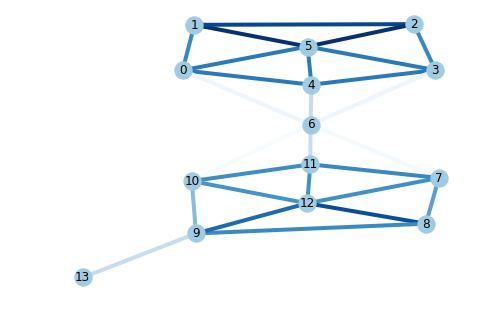

In [37]:
nx.draw(G, pos=gpos, node_color='#A0CBE2', edge_color=sim_edge_col,
        width=4, edge_cmap=plt.cm.Blues, with_labels=True)

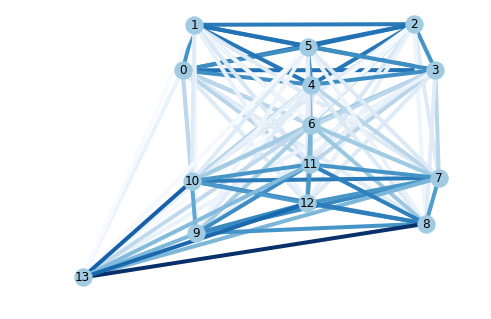

In [38]:
sim_edge_col2 = []
for e in G2.edges:
    sim_edge_col2.append(G_simrank[e[0]][e[1]])
nx.draw(G2, pos=gpos, node_color='#A0CBE2', edge_color=sim_edge_col2,
        width=4, edge_cmap=plt.cm.Blues, with_labels=True)

### 4. Implement Jaccard

Jaccard similarity is defined like this:
$$Jaccard(u, v) = \frac{|N(u) \cap N(v)|}{|N(u) \cup N(v)|}$$
where $N(u)$ denotes the set of neighbors of $u$.

In [26]:
def jaccard(G):
    jac_coef = defaultdict(dict)
    for ni in G.nodes:
        for nj in G.nodes:
            ei = set(e[1] for e in G.edges(ni))
            ej = set(e[1] for e in G.edges(nj))
            jac_coef[ni][nj] = len(ei.intersection(ej)) / len(ei.union(ej))
    return jac_coef

In [27]:
G_jaccard = jaccard(G)
jac_edge_col = []
for e in G.edges:
    jac_edge_col.append(G_jaccard[e[0]][e[1]])

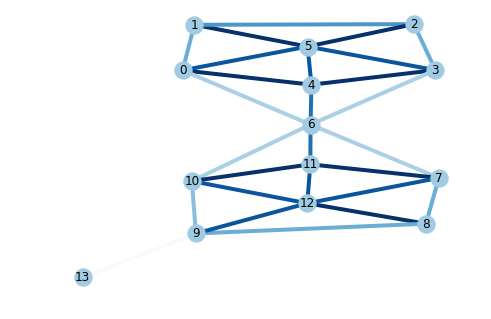

In [39]:
nx.draw(G, pos=gpos, node_color='#A0CBE2', edge_color=jac_edge_col,
        width=4, edge_cmap=plt.cm.Blues, with_labels=True)

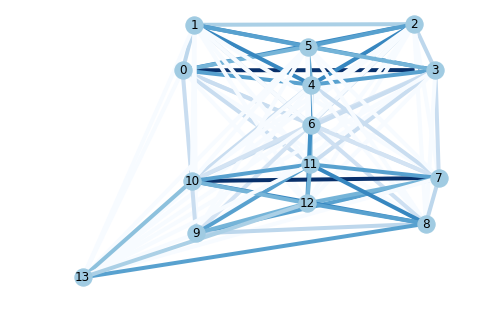

In [40]:
jac_edge_col2 = []
for e in G2.edges:
    jac_edge_col2.append(G_jaccard[e[0]][e[1]])
nx.draw(G2, pos=gpos, node_color='#A0CBE2', edge_color=jac_edge_col2,
        width=4, edge_cmap=plt.cm.Blues, with_labels=True)

### Interpretable example

In [42]:
Gb = nx.Graph()
Gb.add_edges_from([
    (1,2), (1,3),
    (2,4), (3,4),
    (4,0)
])
Gb_pos = nx.spring_layout(Gb)

Gb_sim = simrank(Gb)
Gb_jac = jaccard(Gb)

#### SimRank

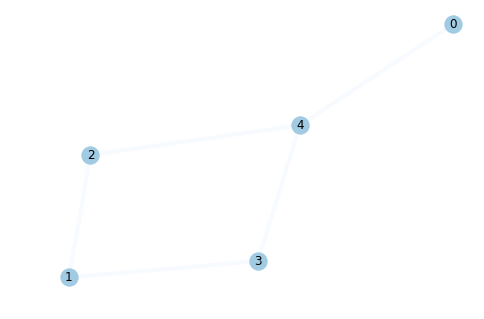

In [43]:
Gb_col = []
for e in Gb.edges:
    Gb_col.append(Gb_sim[e[0]][e[1]])

nx.draw(Gb, pos=Gb_pos, node_color='#A0CBE2', edge_color=Gb_col,
        width=4, edge_cmap=plt.cm.Blues, with_labels=True)

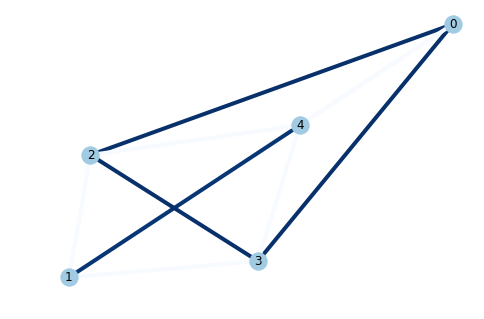

In [44]:
Gb_f = nx.complete_graph(len(Gb))

Gb_f_col = []
for e in Gb_f.edges:
    Gb_f_col.append(Gb_sim[e[0]][e[1]])


nx.draw(Gb_f, pos=Gb_pos, node_color='#A0CBE2', edge_color=Gb_f_col,
        width=4, edge_cmap=plt.cm.Blues, with_labels=True)

#### Jaccard similarity

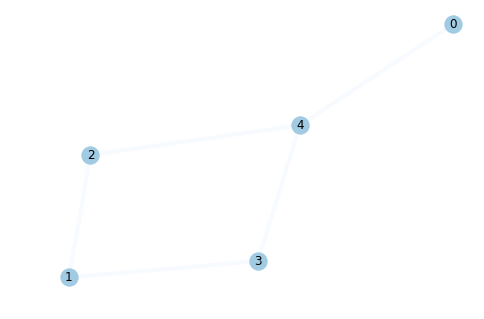

In [45]:
Gb_col = []
for e in Gb.edges:
    Gb_col.append(Gb_jac[e[0]][e[1]])

nx.draw(Gb, pos=Gb_pos, node_color='#A0CBE2', edge_color=Gb_col,
        width=4, edge_cmap=plt.cm.Blues, with_labels=True)

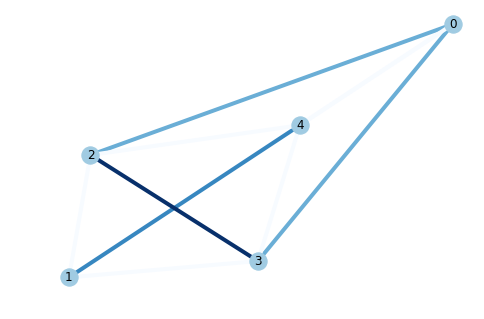

In [46]:
Gb_f_col = []
for e in Gb_f.edges:
    Gb_f_col.append(Gb_jac[e[0]][e[1]])


nx.draw(Gb_f, pos=Gb_pos, node_color='#A0CBE2', edge_color=Gb_f_col,
        width=4, edge_cmap=plt.cm.Blues, with_labels=True)

### Explain differences

**Jaccard similarity** считает похожесть основываясь на **общих соседях**. 

**SimRank** также основывается на похожих соседях, но не просто на их наличии, но на похожести соседей. Потому что это итеративный алгоритм.

Следствие №1)
В обоих случаях вершины без общих соседей имеют score=0

Следствие №2)
SimRank считает похожесть "все ко всем"

Следствие №3)
SimRank имеет критерии сходимости